In [1]:
import pandas as pd
import urllib.request


data = pd.read_csv('../../../news/scraping_result/en/2017_up2/2017_up2_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../../news/scraping_result/en/2017_up2/2017_up2_Cointelegraph.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/en/2017_up2/2017_up2_Forbes.csv', error_bad_lines=False))



In [2]:
text = data[['main article']]
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
import csv
stopword_list =[]
f = open('../../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [14]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [15]:
article_contents = tokenized_doc.values.tolist()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [17]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [18]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [19]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [20]:
word2id = defaultdict(lambda: 0)

In [21]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [22]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [23]:
len(tf_idf_result)

13239

In [24]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

13239


In [25]:
sentences = article_contents

In [26]:
from gensim.models import Word2Vec

In [27]:
model = Word2Vec(sentences, min_count=1)

In [28]:
len(model.wv.vocab)

13239

In [29]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [30]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [31]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [32]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [33]:
temp_cluster_result['cluster'] = assigned_clusters

In [34]:
temp_cluster_result['raw_data'] = X.tolist()

In [35]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [36]:
from sklearn.metrics import pairwise_distances

In [37]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [38]:
len(cosine_centroid_list)

13239

In [39]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [40]:
sum(temp_distance[3])

230.72131392334563

In [41]:
import scipy.spatial.distance as dist

In [42]:
dist.cosine(X[0],cosine_centroid_list[0])

0.004616434977211981

In [43]:
dist.euclidean(X[0],cosine_centroid_list[0])

3.863391155601684

In [44]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [45]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [46]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
810,"[-0.024542467668652534, 0.23439942300319672, -...",blockchain,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.067940,0.200505,0.867435,NaN
145,"[-0.15667489171028137, 0.15741665661334991, -0...",make,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.002161,0.119429,0.882732,NaN
158,"[-0.1846483200788498, 0.22525791823863983, -0....",company,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.007941,0.114560,0.893381,NaN
543,"[-0.1344776749610901, 0.13097888231277466, -0....",people,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.005649,0.093397,0.912252,NaN
148,"[-0.2341592162847519, 0.12543052434921265, -0....",take,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.001704,0.078096,0.923608,NaN
424,"[-0.20590853691101074, 0.16000507771968842, -0...",many,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.001326,0.071538,0.929788,NaN
170,"[-0.18492399156093597, 0.1805654764175415, -0....",user,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.016190,0.083064,0.933126,NaN
11,"[-0.31031835079193115, 0.13591767847537994, -0...",come,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.003819,0.064583,0.939236,NaN
399,"[-0.20573799312114716, 0.16531135141849518, -0...",think,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.003602,0.060211,0.943390,NaN
848,"[-0.09870055317878723, 0.1925455629825592, -0....",business,0,"[-0.026487457, 0.017431224, -0.10197668, -0.07...",0.010035,0.065477,0.944558,NaN


In [47]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 가격 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
31,"[-0.5344944596290588, 0.0809326022863388, -1.1...",bitcoin,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.020108,0.561773,0.458336,NaN
5,"[-0.4694138765335083, 0.1411735564470291, -1.2...",market,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.018757,0.184310,0.834447,NaN
33,"[-0.5274496078491211, 0.05594224855303764, -1....",year,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.009638,0.115256,0.894383,NaN
21,"[-0.4151366651058197, 0.02948888950049877, -1....",time,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.012557,0.114063,0.898494,NaN
15,"[-0.47572749853134155, 0.20742571353912354, -1...",trade,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.033075,0.117740,0.915336,NaN
41,"[-0.3807370066642761, 0.04742967709898949, -1....",value,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.017645,0.096080,0.921565,NaN
30,"[-0.758070170879364, 0.011395702138543129, -1....",price,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.064359,0.121813,0.942546,NaN
290,"[-0.37625616788864136, 0.4226362705230713, -1....",token,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.050378,0.102836,0.947542,NaN
702,"[-0.38576722145080566, 0.2519989609718323, -1....",sell,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.008123,0.048288,0.959835,NaN
7,"[-0.546586811542511, -0.018797947093844414, -1...",high,1,"[-0.034084238, 0.010662641, -0.09150387, -0.05...",0.023375,0.060907,0.962468,NaN


In [48]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(40)   # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4,"[-0.34267741441726685, 0.18044759333133698, -1...",cryptocurrency,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.007688,0.140692,0.866996,NaN
12,"[-0.3501867949962616, 0.20989735424518585, -1....",exchange,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.025245,0.122310,0.902934,NaN
112,"[-0.15148575603961945, 0.14728157222270966, -0...",money,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.002786,0.096477,0.906309,NaN
114,"[-0.30015721917152405, 0.24450470507144928, -1...",investor,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.012853,0.094689,0.918165,NaN
42,"[-0.2733176350593567, 0.1576550304889679, -0.9...",cryptocurrencies,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.006240,0.074519,0.931721,NaN
81,"[-0.1996489018201828, 0.275214821100235, -1.03...",crypto,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.013010,0.073525,0.939485,NaN
2,"[-0.09714893996715546, 0.10340264439582825, -0...",world,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.008743,0.069253,0.939490,NaN
52,"[-0.24189996719360352, 0.3518713414669037, -1....",fund,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.023654,0.081076,0.942577,NaN
235,"[-0.3130699098110199, 0.2698814868927002, -1.1...",investment,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.011398,0.064086,0.947312,NaN
733,"[-0.27933064103126526, 0.32189375162124634, -1...",security,2,"[-0.015723012, 0.014197739, -0.07212509, -0.04...",0.008830,0.051964,0.956866,NaN


In [49]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기술발전

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
12625,"[0.004751559346914291, -0.004587831906974316, ...",worldcoin,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.109638,0.000099,1.109539,NaN
12016,"[0.005854981020092964, -0.0002230346144642681,...",logarithmic,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.135825,0.000099,1.135725,NaN
9087,"[0.005943770986050367, -0.0013083377853035927,...",interestinvestor,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.217562,0.000099,1.217463,NaN
10992,"[0.002401598496362567, 0.0018841386772692204, ...",daedalus,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.230054,0.000099,1.229954,NaN
6652,"[-0.002616586396470666, -0.0016973853344097733...",seigniorage,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.253133,0.000099,1.253034,NaN
9425,"[0.006319038569927216, -0.005737659055739641, ...",conceptual,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.287150,0.000199,1.286951,NaN
12596,"[0.005913201719522476, -0.0007074668537825346,...",underweight,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.301015,0.000099,1.300916,NaN
12406,"[-0.0012604733929038048, -0.002370267175137996...",unanswered,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.307878,0.000099,1.307779,NaN
10689,"[0.004670073743909597, 0.0015776565996930003, ...",systemsthe,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.308471,0.000099,1.308371,NaN
10971,"[0.0015501254238188267, 0.0037994468584656715,...",simultaneous,3,"[0.00078473374, 3.1903935e-05, 0.0016991749, 0...",0.321305,0.000099,1.321206,NaN


In [50]:
y_km = temp_cluster_result['cluster'].values

In [51]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

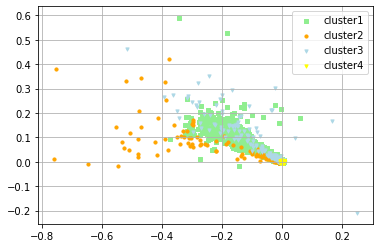

In [52]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [53]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 비즈

11247

In [54]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 가격, 거래소, 돈

756

In [55]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 비즈

1153

In [56]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기술

83

In [57]:
# X[:,1]
from sklearn.cluster import AgglomerativeClustering
import numpy as np

agg = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="cosine")

assign = agg.fit_predict(X)
# assign = agg.fit(X)

In [58]:
len(assign)

13239

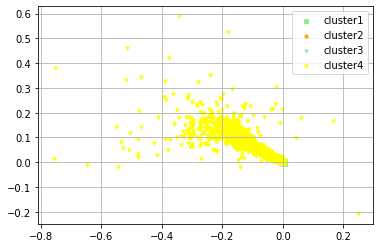

In [59]:
plt.scatter(X[assign==0,0],X[assign==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign==1,0],X[assign==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign==2,0],X[assign==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign==3,0],X[assign==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [60]:
assign

array([3, 3, 3, ..., 3, 3, 3])

In [61]:
from scipy.cluster.hierarchy import dendrogram

In [62]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

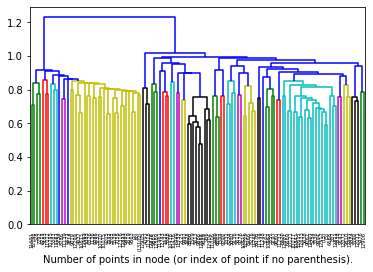

In [63]:

model1 = AgglomerativeClustering(linkage ="average", affinity="cosine", distance_threshold=0, n_clusters=None)

model1.fit(X)

plot_dendrogram(model1, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [64]:
temp_cluster_result0 = pd.DataFrame(columns=temp_heder)

In [65]:
temp_cluster_result0['word'] = list(model.wv.vocab)

In [66]:
temp_cluster_result0['cluster'] = assign

In [67]:
temp_cluster_result0['raw_data'] = X.tolist()

In [68]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, assign)

temp_cluster_result0['centroid'] = temp_cluster_result0['cluster'].apply(lambda x : clf.centroids_[x])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [69]:
cosine_centroid_list0 = []
for cosine_centroid in temp_cluster_result0['centroid'] :
    cosine_centroid_list0.append(cosine_centroid.tolist())

In [70]:
temp_distance0 = pairwise_distances(X,cosine_centroid_list0, metric='cosine')

In [71]:
temp_cluster_result0['distance'] = temp_cluster_result0.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [72]:
temp_cluster_result0['tfidf'] = tf_idf_value
temp_cluster_result0['score'] = temp_cluster_result0.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [73]:
temp_cluster_result0[temp_cluster_result0['cluster']==0].sort_values(by=['score']).head(20)  # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
12016,"[0.005854981020092964, -0.0002230346144642681,...",logarithmic,0,"[0.0011558240512385964, 0.00021058190031908453...",0.107377,0.000099,1.107277,NaN
12625,"[0.004751559346914291, -0.004587831906974316, ...",worldcoin,0,"[0.0011558240512385964, 0.00021058190031908453...",0.110588,0.000099,1.110489,NaN
10992,"[0.002401598496362567, 0.0018841386772692204, ...",daedalus,0,"[0.0011558240512385964, 0.00021058190031908453...",0.229155,0.000099,1.229055,NaN
9087,"[0.005943770986050367, -0.0013083377853035927,...",interestinvestor,0,"[0.0011558240512385964, 0.00021058190031908453...",0.233990,0.000099,1.233891,NaN
9425,"[0.006319038569927216, -0.005737659055739641, ...",conceptual,0,"[0.0011558240512385964, 0.00021058190031908453...",0.253062,0.000199,1.252863,NaN
10689,"[0.004670073743909597, 0.0015776565996930003, ...",systemsthe,0,"[0.0011558240512385964, 0.00021058190031908453...",0.272934,0.000099,1.272835,NaN
6652,"[-0.002616586396470666, -0.0016973853344097733...",seigniorage,0,"[0.0011558240512385964, 0.00021058190031908453...",0.281321,0.000099,1.281221,NaN
12596,"[0.005913201719522476, -0.0007074668537825346,...",underweight,0,"[0.0011558240512385964, 0.00021058190031908453...",0.298811,0.000099,1.298712,NaN
11463,"[0.0024076076224446297, 0.0028028690721839666,...",garza,0,"[0.0011558240512385964, 0.00021058190031908453...",0.302373,0.000099,1.302274,NaN
10971,"[0.0015501254238188267, 0.0037994468584656715,...",simultaneous,0,"[0.0011558240512385964, 0.00021058190031908453...",0.311451,0.000099,1.311351,NaN


In [74]:
temp_cluster_result0[temp_cluster_result0['cluster']==1].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9886,"[-0.0016387420473620296, -0.001021962729282677...",tradable,1,"[-0.0004544160037767142, -0.000833326252177357...",0.270346,0.000199,1.270148,NaN
12588,"[-0.00409014243632555, -0.00035077903885394335...",lemb,1,"[-0.0004544160037767142, -0.000833326252177357...",0.336660,0.000199,1.336461,NaN
1625,"[-0.002429772401228547, 0.0017928843153640628,...",disintermediated,1,"[-0.0004544160037767142, -0.000833326252177357...",0.382093,0.000099,1.381994,NaN
8886,"[-0.0010410286486148834, -0.001470393734052777...",undisputed,1,"[-0.0004544160037767142, -0.000833326252177357...",0.412729,0.000099,1.412630,NaN
5613,"[0.0013118245406076312, 0.0032122782431542873,...",bain,1,"[-0.0004544160037767142, -0.000833326252177357...",0.432198,0.000099,1.432098,NaN
9029,"[0.0010818616719916463, -0.002115914598107338,...",volatilitythe,1,"[-0.0004544160037767142, -0.000833326252177357...",0.450155,0.000099,1.450056,NaN
1509,"[0.0016443858621641994, -0.0003168582334183156...",tepid,1,"[-0.0004544160037767142, -0.000833326252177357...",0.461162,0.000099,1.461063,NaN
12904,"[0.003337310627102852, -0.003014796646311879, ...",forwardincumbents,1,"[-0.0004544160037767142, -0.000833326252177357...",0.489263,0.000099,1.489164,NaN
9492,"[-0.0031730318441987038, -7.767703209538013e-0...",tetra,1,"[-0.0004544160037767142, -0.000833326252177357...",0.544743,0.000099,1.544643,NaN
10478,"[-0.003962979651987553, 0.005058805458247662, ...",opskins,1,"[-0.0004544160037767142, -0.000833326252177357...",0.645615,0.000099,1.645516,NaN


In [75]:
temp_cluster_result0[temp_cluster_result0['cluster']==2].sort_values(by=['score']).head(20)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4097,"[-0.0029258099384605885, 0.0025925564114004374...",sandwich,2,"[-0.0030809231102466583, -0.001082808827050030...",0.257687,0.000099,1.257588,NaN
11318,"[-0.003270681481808424, -0.005432174075394869,...",waywhile,2,"[-0.0030809231102466583, -0.001082808827050030...",0.310151,0.000099,1.310051,NaN
12905,"[-0.00304627837613225, -0.0004088087589479983,...",coursesrecognizing,2,"[-0.0030809231102466583, -0.001082808827050030...",0.353848,0.000099,1.353748,NaN


In [76]:
temp_cluster_result0[temp_cluster_result0['cluster']==3].sort_values(by=['score']).head(20)  # 비즈,  투자, 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
31,"[-0.5344944596290588, 0.0809326022863388, -1.1...",bitcoin,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.062942,0.561773,0.501170,NaN
5,"[-0.4694138765335083, 0.1411735564470291, -1.2...",market,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.047468,0.184310,0.863158,NaN
810,"[-0.024542467668652534, 0.23439942300319672, -...",blockchain,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.071822,0.200505,0.871317,NaN
4,"[-0.34267741441726685, 0.18044759333133698, -1...",cryptocurrency,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.014171,0.140692,0.873479,NaN
145,"[-0.15667489171028137, 0.15741665661334991, -0...",make,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.002654,0.119429,0.883225,NaN
158,"[-0.1846483200788498, 0.22525791823863983, -0....",company,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.008390,0.114560,0.893830,NaN
112,"[-0.15148575603961945, 0.14728157222270966, -0...",money,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.008978,0.096477,0.912501,NaN
543,"[-0.1344776749610901, 0.13097888231277466, -0....",people,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.005990,0.093397,0.912593,NaN
21,"[-0.4151366651058197, 0.02948888950049877, -1....",time,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.030680,0.114063,0.916616,NaN
148,"[-0.2341592162847519, 0.12543052434921265, -0....",take,3,"[-0.02600385993719101, 0.016776200383901596, -...",0.001908,0.078096,0.923812,NaN


In [77]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==0]) # 기술

71

In [78]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==1]) # 이슈

22

In [79]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==2]) # 부정

3

In [80]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==3]) # 비즈/투자

13143

In [83]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, assign, metric='cosine')

In [84]:
silhouette_score

0.88155687

In [ ]:
"""
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 #  가격, 거래소, 돈
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 9 # 기술발전
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈
"""

In [85]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [86]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [87]:
kmeans.inertia_

979.3419189453125

In [88]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 3 1 ... 0 0 0]


In [89]:
cluster_values= list(model.wv.vocab)

In [90]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-979.3419189453125


In [91]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [92]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7479007


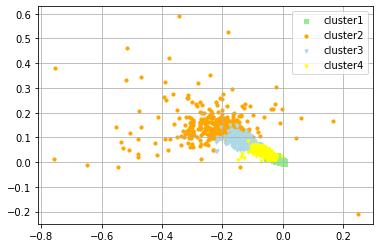

In [93]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [94]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [95]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [96]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [97]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [98]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [99]:
import scipy.spatial.distance as dist

In [100]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [101]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [102]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 인플 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10596,"[-0.010891135782003403, 0.005718643311411142, ...",gulfstream,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.025701,0.000099,1.025602,NaN
1054,"[-0.004267088137567043, 0.002404195722192526, ...",garbage,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.025973,0.000298,1.025675,NaN
8260,"[-0.006251901853829622, 0.008719977922737598, ...",cafe,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.025950,0.000199,1.025751,NaN
13085,"[-0.00920203235000372, 0.0022120557259768248, ...",winterstein,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.025982,0.000199,1.025783,NaN
10053,"[-0.009082058444619179, 5.970196980342735e-06,...",provenence,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.026142,0.000099,1.026043,NaN
11288,"[-0.009660313837230206, 0.009409884922206402, ...",fedex,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.026538,0.000199,1.026340,NaN
11196,"[-0.003974254708737135, 0.0014825088437646627,...",deportation,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.026619,0.000099,1.026520,NaN
992,"[-0.003359176917001605, 0.004397740587592125, ...",horror,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.026983,0.000397,1.026585,NaN
4057,"[-0.008908621035516262, 0.0023986694868654013,...",sock,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.026896,0.000099,1.026797,NaN
12205,"[-0.007599966134876013, 0.004670425318181515, ...",paradis,0,"[-0.007678326, 0.0049020927, -0.02931039, -0.0...",0.026906,0.000099,1.026807,NaN


In [103]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(40,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1508,"[-0.21590939164161682, 0.1474199742078781, -0....",best,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.095867,0.018779,1.077089,NaN
576,"[-0.20540326833724976, 0.14947360754013062, -0...",clear,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.121780,0.018183,1.103597,NaN
939,"[-0.22270004451274872, 0.1308268904685974, -0....",place,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.136600,0.021263,1.115337,NaN
1252,"[-0.2110472172498703, 0.1456790566444397, -0.8...",experience,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.134010,0.016593,1.117417,NaN
310,"[-0.20635798573493958, 0.14423410594463348, -0...",involve,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.139895,0.018977,1.120918,NaN
355,"[-0.2350982278585434, 0.13244137167930603, -0....",course,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.139257,0.015997,1.123260,NaN
375,"[-0.20287883281707764, 0.12565097212791443, -0...",leave,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.152240,0.014010,1.138230,NaN
258,"[-0.20954236388206482, 0.13412417471408844, -0...",sign,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.151996,0.013612,1.138384,NaN
1209,"[-0.20277875661849976, 0.14299488067626953, -0...",others,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.159633,0.016692,1.142941,NaN
991,"[-0.2115647792816162, 0.13037504255771637, -0....",hand,1,"[-0.22066467, 0.144353, -0.83202416, -0.564286...",0.156271,0.013314,1.142957,NaN


In [104]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3159,"[-0.12825113534927368, 0.07491894066333771, -0...",insight,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.049183,0.005564,1.043619,NaN
1428,"[-0.12154387682676315, 0.07657235115766525, -0...",school,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.061776,0.003875,1.057901,NaN
988,"[-0.12525323033332825, 0.07372759282588959, -0...",respond,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.064020,0.005167,1.058853,NaN
413,"[-0.113346166908741, 0.07702362537384033, -0.4...",friend,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.065802,0.004968,1.060834,NaN
1098,"[-0.11875247955322266, 0.07537755370140076, -0...",request,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.071059,0.005962,1.065098,NaN
1730,"[-0.13276077806949615, 0.08273384720087051, -0...",discussion,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.070863,0.004670,1.066193,NaN
1057,"[-0.11861491948366165, 0.08346144109964371, -0...",balance,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.073710,0.006657,1.067053,NaN
381,"[-0.11963269859552383, 0.07905171066522598, -0...",apple,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.074332,0.006260,1.068072,NaN
707,"[-0.12007586658000946, 0.09022527188062668, -0...",sort,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.074873,0.006657,1.068216,NaN
1820,"[-0.13235263526439667, 0.07617110013961792, -0...",gift,2,"[-0.12569293, 0.08122565, -0.47946197, -0.3314...",0.076284,0.004074,1.072211,NaN


In [105]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3529,"[-0.05304426699876785, 0.029088512063026428, -...",pace,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.034420,0.001987,1.032432,NaN
1806,"[-0.0436432920396328, 0.03260007128119469, -0....",recovery,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.034471,0.001888,1.032583,NaN
3695,"[-0.04966980963945389, 0.030617523938417435, -...",college,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.034429,0.001391,1.033038,NaN
2247,"[-0.048486240208148956, 0.03832013159990311, -...",vendor,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.034898,0.001788,1.033110,NaN
2189,"[-0.05424991995096207, 0.033803775906562805, -...",neighbor,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.034933,0.001192,1.033741,NaN
11786,"[-0.05264310538768768, 0.033952321857213974, -...",msci,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.034874,0.000894,1.033980,NaN
5628,"[-0.049271710216999054, 0.03424898907542229, -...",graduate,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.036666,0.001490,1.035176,NaN
3774,"[-0.0461982786655426, 0.035833459347486496, -0...",australian,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.037278,0.001888,1.035390,NaN
2176,"[-0.04421747475862503, 0.03253783658146858, -0...",consistent,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.038033,0.002087,1.035946,NaN
2558,"[-0.054947517812252045, 0.036611348390579224, ...",handful,3,"[-0.052106023, 0.03335514, -0.19865936, -0.137...",0.038602,0.002583,1.036018,NaN


In [106]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 인플

10580

In [107]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 긍정

457

In [108]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 비즈

610

In [109]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 사회문제

1592

In [110]:
agg1 = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="euclidean")

assign1 = agg1.fit_predict(X)

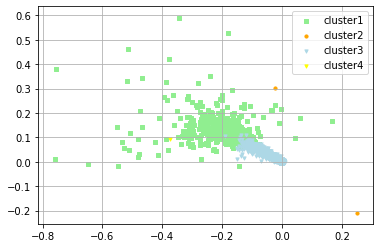

In [111]:
plt.scatter(X[assign1==0,0],X[assign1==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign1==1,0],X[assign1==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign1==2,0],X[assign1==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign1==3,0],X[assign1==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [112]:
temp_cluster_result2 = pd.DataFrame(columns=temp_heder)
temp_cluster_result2['word'] = list(model.wv.vocab)
temp_cluster_result2['cluster'] = assign1
temp_cluster_result2['raw_data'] = X.tolist()
clf1 = NearestCentroid()
clf1.fit(X, assign1)

NearestCentroid()

In [113]:
temp_cluster_result2['centroid'] = temp_cluster_result2['cluster'].apply(lambda x : clf1.centroids_[x])

In [114]:
euclidean_centroid_list2 = []
for euclidean_centroid in temp_cluster_result2['centroid'] :
    euclidean_centroid_list2.append(euclidean_centroid.tolist())

In [115]:

temp_distance2 = pairwise_distances(X,euclidean_centroid_list2, metric='euclidean')

In [116]:
temp_cluster_result2['distance'] = temp_cluster_result2.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [117]:
temp_cluster_result2['tfidf'] = tf_idf_value
temp_cluster_result2['score'] = temp_cluster_result2.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [118]:
temp_cluster_result2[temp_cluster_result2['cluster']==0].sort_values(by=['score']).head(20) # 이슈, 논쟁, 비즈니스

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1214,"[-0.18488448858261108, 0.11483076959848404, -0...",prove,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.084081,0.010234,1.073848,NaN
141,"[-0.19300535321235657, 0.10839124023914337, -0...",determine,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.090323,0.010532,1.079791,NaN
772,"[-0.17903313040733337, 0.11917844414710999, -0...",concern,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.092649,0.010035,1.082614,NaN
2174,"[-0.19848129153251648, 0.11156455427408218, -0...",stop,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.098101,0.011426,1.086675,NaN
695,"[-0.18090872466564178, 0.11772110313177109, -0...",huge,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.120267,0.012718,1.107550,NaN
1332,"[-0.1667436957359314, 0.11491162329912186, -0....",person,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.119054,0.011029,1.108026,NaN
1365,"[-0.17643243074417114, 0.11498282849788666, -0...",choose,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.119625,0.009439,1.110186,NaN
3442,"[-0.17353099584579468, 0.10991609841585159, -0...",house,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.119318,0.008942,1.110376,NaN
365,"[-0.16770413517951965, 0.11686495691537857, -0...",standard,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.121743,0.009638,1.112105,NaN
871,"[-0.18343432247638702, 0.10731765627861023, -0...",story,0,"[-0.18641476333141327, 0.12178128957748413, -0...",0.124612,0.011029,1.113583,NaN


In [119]:
temp_cluster_result2[temp_cluster_result2['cluster']==1].sort_values(by=['score']).head(20) #  암호화폐

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
198,"[0.2485203891992569, -0.2087523341178894, -0.8...",currency,1,"[0.1129545122385025, 0.0467805415391922, -0.89...",1.210334,0.152813,2.057520,NaN
223,"[-0.02261136658489704, 0.3023134171962738, -0....",digital,1,"[0.1129545122385025, 0.0467805415391922, -0.89...",1.210334,0.105419,2.104914,NaN


In [120]:
temp_cluster_result2[temp_cluster_result2['cluster']==2].sort_values(by=['score']).head(20) # 비즈 사회 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5926,"[-0.016249045729637146, 0.009522030130028725, ...",neighborhood,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.026375,0.000497,1.025878,NaN
11843,"[-0.012511488981544971, 0.007262259256094694, ...",supercar,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.027016,0.000199,1.026817,NaN
5451,"[-0.012766593135893345, 0.00590120954439044, -...",corp,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.027638,0.000497,1.027141,NaN
8531,"[-0.019559701904654503, 0.011880873702466488, ...",spouse,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.027774,0.000298,1.027476,NaN
2510,"[-0.016284778714179993, 0.006464582867920399, ...",upfront,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.028337,0.000795,1.027542,NaN
968,"[-0.01339650247246027, 0.013647523708641529, -...",persistent,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.028055,0.000497,1.027558,NaN
422,"[-0.008931353688240051, 0.005191044416278601, ...",knee,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.028066,0.000497,1.027569,NaN
11912,"[-0.01087895967066288, 0.006209329701960087, -...",chaseno,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.027795,0.000199,1.027596,NaN
8080,"[-0.016019565984606743, 0.009355654940009117, ...",andreas,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.028014,0.000298,1.027716,NaN
4580,"[-0.013091669417917728, 0.010654143057763577, ...",foxconn,2,"[-0.015335749834775925, 0.009790297597646713, ...",0.028425,0.000596,1.027829,NaN


In [121]:
temp_cluster_result2[temp_cluster_result2['cluster']==3].sort_values(by=['score']).head(20) # 기타 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
319,"[-0.3738675117492676, 0.09156566113233566, -1....",image,3,"[-0.3738675117492676, 0.09156566113233566, -1....",0.0,0.028417,0.971583,NaN


In [122]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==0]) # 이슈, 논쟁 

810

In [123]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==1]) # 암호화폐

2

In [124]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==2]) # 비즈, 사회

12426

In [125]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==3]) # 기타

1

In [126]:
silhouette_score1 = metrics.silhouette_score(X, assign1, metric='euclidean')

In [127]:
silhouette_score1

0.8445076

In [ ]:
agg2 = AgglomerativeClustering(n_clusters=4, linkage ="ward", affinity="euclidean")

assign2 = agg2.fit_predict(X)

In [ ]:
plt.scatter(X[assign2==0,0],X[assign2==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign2==1,0],X[assign2==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign2==2,0],X[assign2==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign2==3,0],X[assign2==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
temp_cluster_result3 = pd.DataFrame(columns=temp_heder)
temp_cluster_result3['word'] = list(model.wv.vocab)
temp_cluster_result3['cluster'] = assign2
temp_cluster_result3['raw_data'] = X.tolist()
clf2 = NearestCentroid()
clf2.fit(X, assign2)

In [ ]:
temp_cluster_result3['centroid'] = temp_cluster_result3['cluster'].apply(lambda x : clf2.centroids_[x])

In [ ]:
euclidean_centroid_list3 = []
for euclidean_centroid in temp_cluster_result3['centroid'] :
    euclidean_centroid_list3.append(euclidean_centroid.tolist())

In [ ]:
temp_distance3 = pairwise_distances(X,euclidean_centroid_list3, metric='euclidean')

In [ ]:
temp_cluster_result3['distance'] = temp_cluster_result3.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

temp_cluster_result3['tfidf'] = tf_idf_value
temp_cluster_result3['score'] = temp_cluster_result3.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==0].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==1].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==2].sort_values(by=['score']).head(20)

In [ ]:
temp_cluster_result3[temp_cluster_result3['cluster']==3].sort_values(by=['score']).head(20)

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==0])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==1])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==2])

In [ ]:
len(temp_cluster_result3[temp_cluster_result3['cluster']==3])

In [ ]:
silhouette_score3 = metrics.silhouette_score(X, assign2, metric='euclidean')

In [ ]:
silhouette_score3

In [ ]:

"""
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.7476496# 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.7476496
 """

In [ ]:
#temp_cluster_result1.to_csv("../cluster/en_news/2017_up2/en_news_2017_up2_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/en_news/2017_up2/en_news_2017_up2_cosine.csv")